In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
sys.path.append('../')
from Scattering_Simulator import pairwise_method

## Load the Coordinates of the Structure
Import the coodinates of a sphere for validation purposes. The coordinates should be in cartesian form with 3 columns and the number of rows according to the number of points.

In [37]:
coordinates = np.load('../Data/coordinates/sphere_2512points.npy')

#Optional: Add random displacement to the coordinates of the sphere
max_displacement = 0
random_displacement = np.random.rand(coordinates.shape[0], 3)*max_displacement + max_displacement/2
coordinates = coordinates + random_displacement

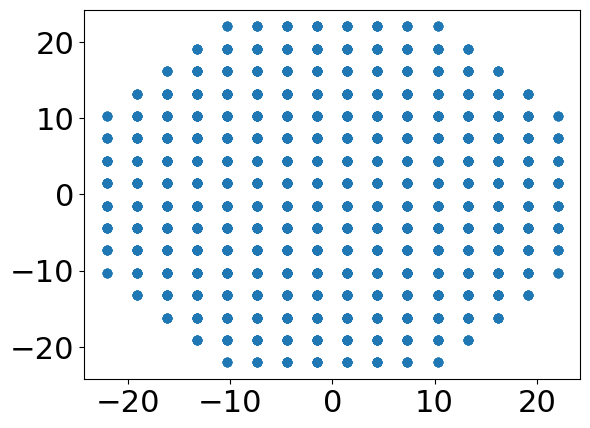

In [38]:
plt.scatter(coordinates[:,0], coordinates[:,1])

## Sample from the Structure
The variable "n_samples" is the number of pairwise distances calculated for the pairwise distribution function. A larger number of distances will lead to a better result with the drawback of computational time. There seems to be a limit where increasing the number of pairwise distances does not have any effect on the results. 

In [39]:
n_samples = 10000000

In [40]:
simulator = pairwise_method.scattering_simulator(n_samples)
simulator.sample_building_block(coordinates)
simulator.use_building_block_as_structure()

## Simulate the Scattering Curve
The variable "histogram_bins" refers to the number of bins in the pairwise distribution function. A larger number of bins will lead to a better result with the drawback of computational time. There also seems to be a limit where increasing the number of bins does not have any effect on the results.

In [41]:
histogram_bins = 10000
q = np.geomspace(0.01, 1, 300)
I_q_10m = simulator.simulate_scattering_curve(histogram_bins, q)

## Plot the Results

The result will be plotted and compared to the analytical solution of a sphere. A background term will be added to the simulated scattering curve. 

In [42]:
#Analytical Solution of a Sphere
def sphere(q, r):
    return 3*(np.sin(q*r) - q*r*np.cos(q*r))**2/(q*r)**6
I_sphere = sphere(q, 25)

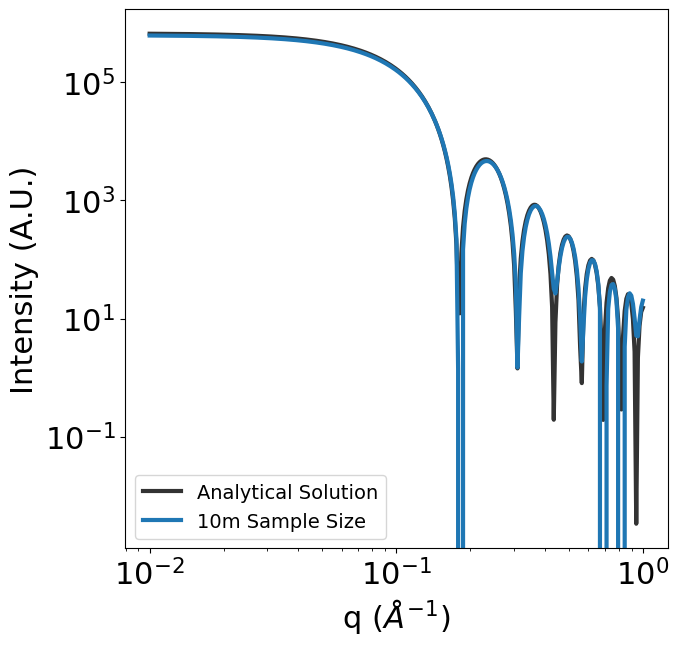

In [43]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(7,7))
plt.plot(q, I_sphere*2e6 + 0, linewidth = 3, label = 'Analytical Solution', color = 'k', alpha = 0.8)
plt.plot(q, I_q_10m + 1.4e2, linewidth = 3, label = '10m Sample Size')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Intensity (A.U.)')
plt.xlabel('q ($\AA^{-1}$)')
plt.legend(fontsize=14)